In [1]:
import numpy as np
import pesfit as pf
from silx.io.dictdump import h5todict
import matplotlib.pyplot as plt
import lmfit.models as lmm

In [2]:
dataset = h5todict(r'..\data\hsymline_symmetrized.h5')

In [3]:
kEmap = dataset['data']['kimage']
kEmap.shape

(500, 186)

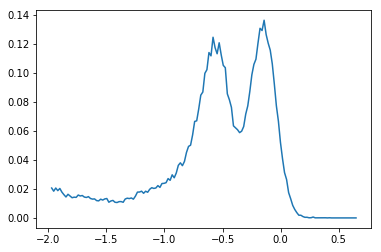

In [4]:
plt.plot(dataset['data']['E'][:150], kEmap[:150, 100])

In [5]:
xvals = dataset['data']['E'][:150]
y = kEmap[:150, 100]
yvals = y/y.max()

In [7]:
mdl = pf.lineshape.MultipeakModel(n=3, lineshape=lmm.SkewedGaussianModel, background=lmm.GaussianModel(prefix='bg_'))
pars = mdl.make_params()

vardict = [{'lp1_':{'center':dict(value=-0.1, min=-0.4, vary=True),
                  'amplitude':dict(value=0.3, min=0, max=1, vary=False),
                  'sigma':dict(value=0.12, min=0.05, max=2, vary=True),
                  'gamma':dict(value=0.05, min=0, max=2, vary=False)}},
           
           {'lp2_':{'center':dict(value=-0.58, vary=True),
                   'amplitude':dict(value=0.25, min=0, max=1, vary=True),
                   'sigma':dict(value=0.12, min=0.05, max=2, vary=False),
                   'gamma':dict(value=0.05, min=0, max=2, vary=True)}},
           
           {'lp3_':{'center':dict(value=-0.9, min=-1.1, max=-0.7, vary=True),
                   'amplitude':dict(value=0.09, min=0, max=0.5, vary=True),
                   'sigma':dict(value=0.22, min=0.05, max=2, vary=True),
                   'gamma':dict(value=0.02, min=0, max=2, vary=True)}},
           
           {'bg_':{'center':dict(value=-3, min=-5, max=-2, vary=True),
                   'amplitude':dict(value=0.55, min=0, max=2, vary=True),
                   'sigma':dict(value=1, min=0.5, max=5, vary=True)}}]


pf.fitter.varsetter(pars, vardict, ret=False)

out = mdl.fit(yvals, pars, x=xvals)
comps = out.eval_components(x=xvals)

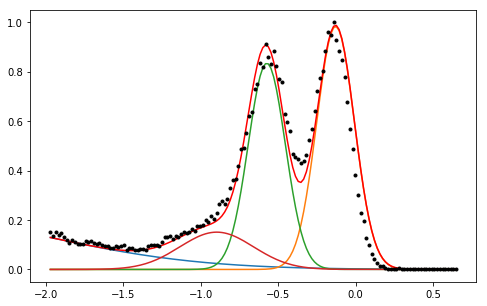

In [8]:
pf.fitter.plot_fit_result(out, xvals, downsamp=1)